## 1. READ FILE & processing data

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/HCMUS-KHDL-K30/KR/main/hcm_house_data.csv')
df.head()

,SalePrice,location_street,location_ward,location_district,number_of_toilet,access_to_school,access_to_hospital,access_to_market,number_of_floor,is_having_basement,is_having_attic_floor,is_having_rooftop,alley_width,number_of_bedroom,loc_lat,loc_long,total_sqft
0,6730.84500,Đường Phú Thọ,Phường 1 Quận 11,Quận 11,1,0,0,1,2.5,0,0,0,120.0,1,10.756489,106.641857,70.1
1,9733.14684,Đường Phú Thọ,Phường 1 Quận 11,Quận 11,1,1,0,1,2.5,0,0,0,120.0,2,10.756489,106.641857,108.4
2,13442.52000,Đường Huỳnh Tấn Phát,Phường Phú Mỹ Quận 7,Quận 7,5,1,0,1,3.0,0,0,0,150.0,4,10.708689,106.734241,189.4
3,16799.40000,Đường Huỳnh Tấn Phát,Phường Phú Mỹ Quận 7,Quận 7,7,1,0,1,5.5,0,0,0,150.0,7,10.708689,106.734241,379.4
4,1566.30000,Đường 10,Phường Cát Lái Quận 2,Quận 2,2,1,1,1,1.0,0,0,0,100.0,2,10.769163,106.786091,23.0


## 1.1 Get info data

In [2]:
# review data
print(df.info)


<bound method DataFrame.info of          SalePrice         location_street                      location_ward  \
0       6730.84500           Đường Phú Thọ                   Phường 1 Quận 11   
1       9733.14684           Đường Phú Thọ                   Phường 1 Quận 11   
2      13442.52000    Đường Huỳnh Tấn Phát               Phường Phú Mỹ Quận 7   
3      16799.40000    Đường Huỳnh Tấn Phát               Phường Phú Mỹ Quận 7   
4       1566.30000                Đường 10              Phường Cát Lái Quận 2   
...            ...                     ...                                ...   
26679   2740.03200  Đường Nguyễn Phi Khanh             Phường Tân Định Quận 1   
26680   1288.32000       Đường Kha Vạn Cân  Phường Linh Tây Thành phố Thủ Đức   
26681  10864.05000          Đường Trần Phú                    Phường 4 Quận 5   
26682   1721.40000     Đường Trần Văn Đang                    Phường 9 Quận 3   
26683   2127.74000        Đường Thống Nhất              Phường 16 Quận Gò Vấp

## 1.2 Prepare data

Change data type to code

In [3]:
# review data 
print(df.head())
print(df.describe())


     SalePrice       location_street          location_ward location_district  \
0   6730.84500         Đường Phú Thọ       Phường 1 Quận 11           Quận 11   
1   9733.14684         Đường Phú Thọ       Phường 1 Quận 11           Quận 11   
2  13442.52000  Đường Huỳnh Tấn Phát   Phường Phú Mỹ Quận 7            Quận 7   
3  16799.40000  Đường Huỳnh Tấn Phát   Phường Phú Mỹ Quận 7            Quận 7   
4   1566.30000              Đường 10  Phường Cát Lái Quận 2            Quận 2   

   number_of_toilet  access_to_school  access_to_hospital  access_to_market  \
0                 1                 0                   0                 1   
1                 1                 1                   0                 1   
2                 5                 1                   0                 1   
3                 7                 1                   0                 1   
4                 2                 1                   1                 1   

   number_of_floor  is_having_basement

## Caculated distance to center

In [4]:
from geopy import distance
lat_long = df['loc_lat'].astype(str) + ',' + df['loc_long'].astype(str)
lat_long = list(map(eval, lat_long))
hcm_center = (10.769444, 106.681944)
miles = []
for i in lat_long:
    miles.append(round(distance.distance(i, hcm_center).km, 1))
df['dist2center'] = miles

In [5]:
print(df.head(-50))

         SalePrice        location_street            location_ward  \
0       6730.84500          Đường Phú Thọ         Phường 1 Quận 11   
1       9733.14684          Đường Phú Thọ         Phường 1 Quận 11   
2      13442.52000   Đường Huỳnh Tấn Phát     Phường Phú Mỹ Quận 7   
3      16799.40000   Đường Huỳnh Tấn Phát     Phường Phú Mỹ Quận 7   
4       1566.30000               Đường 10    Phường Cát Lái Quận 2   
...            ...                    ...                      ...   
26629   7067.28960  Đường Thích Quảng Đức  Phường 5 Quận Phú Nhuận   
26630   3020.71848           Đường Mễ Cốc         Phường 15 Quận 8   
26631   4437.95616           Đường Cô Bắc  Phường 1 Quận Phú Nhuận   
26632   3885.69000       Đường Hoàng Diệu          Phường 8 Quận 4   
26633   4346.65000           Đường Bà Hạt         Phường 9 Quận 10   

      location_district  number_of_toilet  access_to_school  \
0               Quận 11                 1                 0   
1               Quận 11          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SalePrice              26684 non-null  float64
 1   location_street        26684 non-null  object 
 2   location_ward          26684 non-null  object 
 3   location_district      26684 non-null  object 
 4   number_of_toilet       26684 non-null  int64  
 5   access_to_school       26684 non-null  int64  
 6   access_to_hospital     26684 non-null  int64  
 7   access_to_market       26684 non-null  int64  
 8   number_of_floor        26684 non-null  float64
 9   is_having_basement     26684 non-null  int64  
 10  is_having_attic_floor  26684 non-null  int64  
 11  is_having_rooftop      26684 non-null  int64  
 12  alley_width            26684 non-null  float64
 13  number_of_bedroom      26684 non-null  int64  
 14  loc_lat                26684 non-null  float64
 15  lo

## 2. FEATURE SELECTION & DATA SPLIT

In [7]:
## 3. FEATURE SELECTION & DATA SPLIT
# # list feature

features = ['number_of_bedroom', 'number_of_toilet', 'access_to_school', 'access_to_hospital', 'access_to_market', 
            'number_of_floor','alley_width', 'total_sqft','dist2center']


In [8]:
X = df[features]
X.head()


,number_of_bedroom,number_of_toilet,access_to_school,access_to_hospital,access_to_market,number_of_floor,alley_width,total_sqft,dist2center
0,1,1,0,0,1,2.5,120.0,70.1,4.6
1,2,1,1,0,1,2.5,120.0,108.4,4.6
2,4,5,1,0,1,3.0,150.0,189.4,8.8
3,7,7,1,0,1,5.5,150.0,379.4,8.8
4,2,2,1,1,1,1.0,100.0,23.0,11.4


In [10]:
y = df['SalePrice']
y.describe()

count    26684.000000
mean      6399.843505
std       4571.128604
min       1000.160000
25%       3430.242025
50%       5001.105300
75%       7655.974800
max      30000.000000
Name: SalePrice, dtype: float64

In [11]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# forward_selection
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_selection(X,y)

<ipython-input-11-abe91d8b31c3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-11-abe91d8b31c3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-11-abe91d8b31c3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-11-abe91d8b31c3>:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_featur

['alley_width',
 'number_of_toilet',
 'total_sqft',
 'dist2center',
 'number_of_floor',
 'access_to_school',
 'number_of_bedroom',
 'access_to_hospital',
 'access_to_market']

In [12]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

backward_elimination(X,y)

['number_of_bedroom',
 'access_to_school',
 'access_to_hospital',
 'access_to_market',
 'number_of_floor',
 'alley_width',
 'total_sqft',
 'dist2center']

In [13]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

stepwise_selection(X,y)

<ipython-input-13-ff08574a87e6>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-13-ff08574a87e6>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-13-ff08574a87e6>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-13-ff08574a87e6>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['alley_width',
 'total_sqft',
 'dist2center',
 'number_of_floor',
 'access_to_school',
 'number_of_bedroom',
 'access_to_hospital',
 'access_to_market']

In [14]:
best_features = ['total_sqft',
 'dist2center',
 'alley_width',
 'number_of_floor',
 'access_to_school',
 'number_of_bedroom',
 'access_to_hospital']


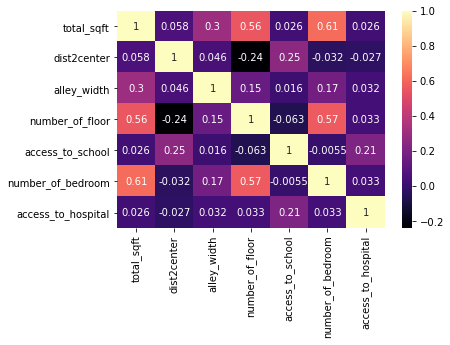

In [15]:
import seaborn as sb
sb.heatmap(df[best_features].corr(), annot=True, cmap='magma')

/Users/thao/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


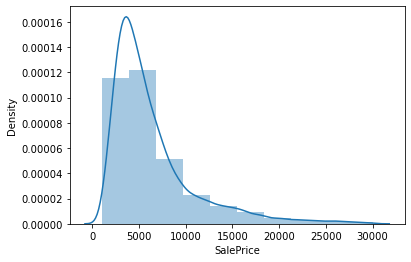

In [16]:
import seaborn as sns
#histogram of Sale price distribution
sns.distplot(df['SalePrice'], bins = 10)


In [17]:
from scipy.stats import skew
#Top skewed columns

skewed_features = df[best_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 1]
print(high_skew)

alley_width           6.627814
total_sqft            1.734680
access_to_hospital    1.406522
number_of_bedroom     1.078560
dtype: float64


In [18]:
# #Transforming skewed columns
# for feature in high_skew.index:
#     df[feature] = np.log1p(df[feature])

In [19]:
from termcolor import colored as cl 
from sklearn.metrics import explained_variance_score as evs  # evaluation metric
from sklearn.metrics import r2_score as r2  # evaluation metric
from sklearn.model_selection import train_test_split 
# Split train & test dataset
X_var = df[best_features].values
y_var = df['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.2, random_state=0)


In [20]:

# 4.1. OLS

ols = LinearRegression()
results = ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


# 2. R-squared
print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.5714519022645989
-------------------------------------------------------------------------------


In [21]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                          1.517e+04
Date:                Thu, 22 Jul 2021   Prob (F-statistic):                        0.00
Time:                        22:41:06   Log-Likelihood:                     -2.0274e+05
No. Observations:               21347   AIC:                                  4.055e+05
Df Residuals:                   21340   BIC:                                  4.056e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
import statsmodels.api as sm

model = sm.OLS(y_var, X_var)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                          1.897e+04
Date:                Thu, 22 Jul 2021   Prob (F-statistic):                        0.00
Time:                        22:41:06   Log-Likelihood:                     -2.5336e+05
No. Observations:               26684   AIC:                                  5.067e+05
Df Residuals:                   26677   BIC:                                  5.068e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
print(results.params)


[  31.71819472 -203.72811577  288.04605346  456.73761609  112.23623035
  331.10143123  274.02663436]


In [24]:
s1 = pd.Series(best_features)
s2 = pd.Series(results.params)
s3 = pd.concat([s1, s2], axis =1)
s3

,0,1
0,total_sqft,31.718195
1,dist2center,-203.728116
2,alley_width,288.046053
3,number_of_floor,456.737616
4,access_to_school,112.236230
5,number_of_bedroom,331.101431
6,access_to_hospital,274.026634


## Model
SalePrice = 31.718195 *total_sqft -203.728116 dist2center + 288.046053 *alley_width + 456.737616*number_of_floor + 112.236230 *access_to_school + 331.101431 *number_of_bedroom + 274.026634 * access_to_hospital




## KNN

In [25]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow((point1[i] - point2[i]), 2)
    return math.sqrt(sum_squared_distance)



### Calculate Direct Distance

In [26]:
lat_long = df['loc_lat'].astype(str) + ',' + df['loc_long'].astype(str)
lat_long = list(map(eval, lat_long))
# home_predict = GT([3],[4])
home_predict = (10.7564889, 106.6418574)
kilometers = []
for i in lat_long:
    kilometers.append(round(distance.distance(i, home_predict).km, 2))
df['dist2home_i'] = kilometers
df['dist2home_i*1000'] = df['dist2home_i']*1000

In [27]:
# raw_houses_data = []

raw_houses_data = df.values.tolist()

houses_recommendation_data = []
for row in raw_houses_data:
    data_row = list(map(float, row[:][14:]))
    houses_recommendation_data.append(data_row)
houses_recommendation_data

[[10.7564889, 106.6418574, 70.1, 4.6, 0.0, 0.0],
 [10.7564889, 106.6418574, 108.4, 4.6, 0.0, 0.0],
 [10.7086888, 106.7342406, 189.4, 8.8, 11.4, 11400.0],
 [10.7086888, 106.7342406, 379.4, 8.8, 11.4, 11400.0],
 [10.7691633, 106.7860907, 23.0, 11.4, 15.84, 15840.0],
 [10.7251178, 106.7282506, 137.3, 7.0, 10.07, 10070.0],
 [10.700191, 106.7050059, 260.3, 8.1, 9.3, 9300.0],
 [10.700191, 106.7050059, 278.5, 8.1, 9.3, 9300.0],
 [10.700191, 106.7050059, 290.2, 8.1, 9.3, 9300.0],
 [10.7251178, 106.7282506, 140.0, 7.0, 10.07, 10070.0],
 [10.7447038, 106.7042941, 130.0, 3.7, 6.95, 6950.0],
 [10.8140185, 106.679326, 36.9, 4.9, 7.57, 7570.0],
 [10.8140185, 106.679326, 154.1, 4.9, 7.57, 7570.0],
 [10.7414555, 106.6457889, 44.7, 5.0, 1.72, 1720.0],
 [10.7971361, 106.7196625, 83.0, 5.1, 9.62, 9620.0],
 [10.8012428, 106.7109826, 84.7, 4.7, 9.04, 9040.0],
 [10.86065, 106.7557976, 100.9, 12.9, 16.97, 16970.0],
 [10.8012428, 106.7109826, 116.8, 4.7, 9.04, 9040.0],
 [10.8300283, 106.7220192, 116.9, 8.0, 1

In [28]:
# from knn_from_scratch import knn, euclidean_distance

def recommend_houses(house_query, k_recommendations):
    raw_houses_data = df.values.tolist()

    # Prepare the data for use in the knn algorithm by picking
    # the relevant columns and converting the numeric columns
    # to numbers since they were read in as strings

    houses_recommendation_data = []
    for row in raw_houses_data:
        data_row = list(map(float, row[:][16:]))
        houses_recommendation_data.append(data_row)

    # Use the KNN algorithm to get the 3 houses that are most
    # similar to the_predict.
    recommendation_indices, _ = knn(
        houses_recommendation_data, house_query, k=k_recommendations,
        distance_fn=euclidean_distance, choice_fn=lambda x: None
    )

    house_recommendations = []
    for _, index in recommendation_indices:
        house_recommendations.append(raw_houses_data[index])

    return house_recommendations

if __name__ == '__main__':
    the_predict = [150, 0.0, 0.0, 0.0] # feature vector for The Predict
    recommended_houses = recommend_houses(house_query=the_predict, k_recommendations=3)

    # Print recommended house
    for recommendation in recommended_houses:
        print(recommendation)

[6076.14, 'Đường Tân Phước', 'Phường 7 Quận 10', 'Quận 10', 3, 0, 0, 0, 3.0, 0, 0, 1, 2.5, 4, 10.7614672, 106.6622882, 150.0, 2.3, 2.3, 2300.0]
[13421.76, 'Đường Bà Hạt', 'Phường 8 Quận 10', 'Quận 10', 3, 0, 0, 0, 4.5, 0, 0, 0, 15.0, 3, 10.7656931, 106.6676254, 150.0, 1.6, 3.0, 3000.0]
[21538.048, 'Đường Nguyễn Tri Phương', 'Phường 5 Quận 10', 'Quận 10', 5, 0, 0, 0, 3.0, 0, 0, 0, 6.4, 6, 10.7638435, 106.6679202, 149.4, 1.7, 2.96, 2960.0]


In [29]:
recommended_houses_df = pd.DataFrame(recommended_houses)
recommended_houses_df.columns = df.columns
recommended_houses_df

,SalePrice,location_street,location_ward,location_district,number_of_toilet,access_to_school,access_to_hospital,access_to_market,number_of_floor,is_having_basement,is_having_attic_floor,is_having_rooftop,alley_width,number_of_bedroom,loc_lat,loc_long,total_sqft,dist2center,dist2home_i,dist2home_i*1000
0,6076.140,Đường Tân Phước,Phường 7 Quận 10,Quận 10,3,0,0,0,3.0,0,0,1,2.5,4,10.761467,106.662288,150.0,2.3,2.30,2300.0
1,13421.760,Đường Bà Hạt,Phường 8 Quận 10,Quận 10,3,0,0,0,4.5,0,0,0,15.0,3,10.765693,106.667625,150.0,1.6,3.00,3000.0
2,21538.048,Đường Nguyễn Tri Phương,Phường 5 Quận 10,Quận 10,5,0,0,0,3.0,0,0,0,6.4,6,10.763844,106.667920,149.4,1.7,2.96,2960.0


### Implement Rules to adjust Recomended_House_Price 